In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [3]:
## 1. 전체 데이터, pickle 데이터 불러오기

In [22]:
jeju = pd.read_csv('./datas/jeju_full.csv')
jeju.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
with open('./datas/jeju_uniq_data5.pickle', 'rb') as f:
    may = pickle.load(f)
may

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273178,268815,268815,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,50000,0,1,0,889087.2224,1.472077e+06,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641,안덕면
273179,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,이호일동
273180,269436,269436,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,240000,0,1,0,903666.4287,1.475096e+06,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071,하원동
273181,270508,270508,202005,제주특별자치도,제주시,일반,기타음료식품,x시,90750,0,1,0,907738.4497,1.501454e+06,126.50672452857444,33.50097517749024,126.50672452857444_33.50097517749024,용담이동


In [41]:
hankyung_5 = may[may['dong'].isin(['한경면'])]
len(hankyung_5)

2849

In [42]:
with open('./datas/jeju_uniq_data6.pickle', 'rb') as f:
    june = pickle.load(f)

In [43]:
hankyung_6 = june[june['dong'].isin(['한경면'])]

In [44]:
with open('./datas/jeju_uniq_data7.pickle', 'rb') as f:
    july = pickle.load(f)

In [45]:
hankyung_7 = july[july['dong'].isin(['한경면'])]

In [46]:
with open('./datas/jeju_uniq_data8.pickle', 'rb') as f:
    august = pickle.load(f)

In [47]:
hankyung_8 = august[august['dong'].isin(['한경면'])]

In [31]:
## 5, 6, 7, 8월 pickle 데이터 'hankyung'에 합치고 'X', 'Y' 컬럼 드랍

In [76]:
frames = [hankyung_5, hankyung_6, hankyung_7, hankyung_8]
hankyung = pd.concat(frames, axis=0)
hankyung.drop(columns=['X', 'Y'], inplace=True)
len(hankyung)

12102

In [15]:
##'jeju' Type replace 해서 'hankyung' 데이터에 넣기

In [49]:
hankyung.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
hankyung.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
hankyung.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
hankyung.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
hankyung.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
hankyung.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
hankyung.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
hankyung.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
hankyung.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
hankyung.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
hankyung.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
hankyung.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
hankyung.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
hankyung.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
hankyung.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
hankyung.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
hankyung.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
hankyung.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

In [50]:
hankyung.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
279420,191507,191507,202008,제주특별자치도,제주시,영세,여행/숙박,18시,1938000,0,1,0,883243.6727,1.481745e+06,126.24562415185463,33.32085488754027,126.24562415185463_33.32085488754027,한경면
279759,210013,210013,202008,제주특별자치도,제주시,영세,여행/숙박,19시,70000,0,1,0,877232.2099,1.484715e+06,126.18065059192516,33.34696698754469,126.18065059192516_33.34696698754469,한경면
279760,241385,241385,202008,제주특별자치도,제주시,영세,여행/숙박,21시,120000,0,1,0,877232.2099,1.484715e+06,126.18065059192516,33.34696698754469,126.18065059192516_33.34696698754469,한경면
279761,210048,210048,202008,제주특별자치도,제주시,영세,카페/베이커리,19시,26000,0,1,0,877829.2907,1.485267e+06,126.1869909618797,33.35201808683074,126.1869909618797_33.35201808683074,한경면
280065,269369,269369,202008,제주특별자치도,제주시,영세,교육/육아,x시,136000,0,1,0,881934.4955,1.483788e+06,126.23129493157387,33.339133500362976,126.23129493157387_33.339133500362976,한경면


In [52]:
tot_hankyung = hankyung.groupby(['YM', 'Type'], as_index=False).sum()

### 총 이용 금액, 지원금 이용 금액

In [120]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(411)
# ax1 = sns.barplot(x='Type', y='TotalSpent', data=tot_hankyung[tot_hankyung['YM'] == 202005].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax1.set_title('5월 업종별 총 이용금액 (TotalSpent)')

# ax2 = fig.add_subplot(412)
# ax2 = sns.barplot(x='Type', y='TotalSpent', data=tot_hankyung[tot_hankyung['YM'] == 202006].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax2.set_xticks(fontsize=10, rotation=45)
# ax2.set_title('6월 업종별 총 이용금액 (TotalSpent)')

# ax3 = fig.add_subplot(413)
# ax3 = sns.barplot(x='Type', y='TotalSpent', data=tot_hankyung[tot_hankyung['YM'] == 202007].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax3.set_xticks(fontsize=10, rotation=45)
# ax3.set_title('7월 업종별 총 이용금액 (TotalSpent)')

# ax4 = fig.add_subplot(414)
# ax4 = sns.barplot(x='Type', y='TotalSpent', data=tot_hankyung[tot_hankyung['YM'] == 202008].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax4.set_title('8월 업종별 총 이용금액 (TotalSpent)')
# plt.show()

In [119]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(411)
# ax1 = sns.barplot(x='Type', y='DisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202005].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax1.set_title('5월 업종별 총 지원금 이용금액 (DisSpent)')

# ax2 = fig.add_subplot(412)
# ax2 = sns.barplot(x='Type', y='DisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202006].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax2.set_xticks(fontsize=10, rotation=45)
# ax2.set_title('6월 업종별 총 지원금 이용금액 (DisSpent)')

# ax3 = fig.add_subplot(413)
# ax3 = sns.barplot(x='Type', y='DisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202007].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax3.set_xticks(fontsize=10, rotation=45)
# ax3.set_title('7월 업종별 총 지원금 이용금액 (DisSpent)')

# ax4 = fig.add_subplot(414)
# ax4 = sns.barplot(x='Type', y='DisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202008].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax4.set_title('8월 업종별 총 지원금 이용금액 (DisSpent)')
# plt.show()

In [121]:
# plt.figure(figsize=(10,6))
# sns.catplot(x='YM', y='TotalSpent', col='Type', data=tot_hankyung.sort_values(by='TotalSpent', ascending=False),
#             kind='bar', col_wrap=3, palette='coolwarm');

In [122]:
# plt.figure(figsize=(10,6))
# sns.catplot(x='YM', y='DisSpent', col='Type', data=tot_hankyung.sort_values(by='DisSpent', ascending=False),
#             kind='bar', col_wrap=3, palette='coolwarm');

In [53]:
tot_hankyung

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,건설/제조,2599556,2599556,2791430,603400,119,23,2.457084e+07,4.152163e+07
1,202005,교육/육아,4139518,4139518,48629210,0,159,0,3.431213e+07,5.780590e+07
2,202005,교통/통신,365810,365810,193000,10000,5,1,3.512529e+06,5.938477e+06
3,202005,농업,7070614,7070614,130698360,34332650,1325,370,6.945825e+07,1.170263e+08
4,202005,레저/스포츠,12486658,12486658,209773200,273000,1953,9,9.855624e+07,1.660944e+08
...,...,...,...,...,...,...,...,...,...,...
62,202008,영화/문화,3715364,3715364,6247600,0,363,0,2.921001e+07,4.890938e+07
63,202008,외식/주점,222772997,222772997,522972016,1958210,15741,51,1.458907e+09,2.458419e+09
64,202008,의료,9449726,9449726,16405130,121060,863,7,8.517652e+07,1.437183e+08
65,202008,주유/자동차,11771613,11771613,182432270,394570,3653,8,1.001864e+08,1.690775e+08


### 업종별 총 이용 건수, 지원금 이용 건수

In [ ]:
## 'NumofSpent', 'NumofDisSpent' norm해서 barchart 겹쳐서 보기

In [56]:
col = ['NumofSpent', 'NumofDisSpent']
num_hankyung = tot_hankyung[col] / tot_hankyung[col].max()

In [57]:
norm_hankyung = tot_hankyung.copy()
norm_hankyung[col] = num_hankyung[col]
norm_hankyung

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,건설/제조,2599556,2599556,2791430,603400,0.005261,0.006811,2.457084e+07,4.152163e+07
1,202005,교육/육아,4139518,4139518,48629210,0,0.007030,0.000000,3.431213e+07,5.780590e+07
2,202005,교통/통신,365810,365810,193000,10000,0.000221,0.000296,3.512529e+06,5.938477e+06
3,202005,농업,7070614,7070614,130698360,34332650,0.058582,0.109565,6.945825e+07,1.170263e+08
4,202005,레저/스포츠,12486658,12486658,209773200,273000,0.086347,0.002665,9.855624e+07,1.660944e+08
...,...,...,...,...,...,...,...,...,...,...
62,202008,영화/문화,3715364,3715364,6247600,0,0.016049,0.000000,2.921001e+07,4.890938e+07
63,202008,외식/주점,222772997,222772997,522972016,1958210,0.695950,0.015102,1.458907e+09,2.458419e+09
64,202008,의료,9449726,9449726,16405130,121060,0.038155,0.002073,8.517652e+07,1.437183e+08
65,202008,주유/자동차,11771613,11771613,182432270,394570,0.161509,0.002369,1.001864e+08,1.690775e+08


In [58]:
norm_hankyung[norm_hankyung['YM'] == 202005].sort_values(by='NumofSpent', ascending=False)

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
5,202005,마트/편의점(유통),51052577,51052577,321806290,68551700,0.809665,1.000000,3.907108e+08,6.580429e+08
13,202005,외식/주점,196176233,196176233,396960290,42355376,0.553144,0.436482,1.312895e+09,2.212072e+09
15,202005,주유/자동차,11632711,11632711,161633305,18520650,0.123309,0.082914,1.037002e+08,1.749973e+08
4,202005,레저/스포츠,12486658,12486658,209773200,273000,0.086347,0.002665,9.855624e+07,1.660944e+08
16,202005,카페/베이커리,23277049,23277049,31241730,2855920,0.071624,0.052413,1.690899e+08,2.846825e+08
3,202005,농업,7070614,7070614,130698360,34332650,0.058582,0.109565,6.945825e+07,1.170263e+08
14,202005,의료,8769853,8769853,14966900,3543620,0.039570,0.055375,8.165227e+07,1.377843e+08
12,202005,영화/문화,3019531,3019531,7744000,348500,0.013308,0.004442,2.566387e+07,4.298524e+07
7,202005,생활/기타,5215416,5215416,7300600,1873900,0.013043,0.014806,3.963255e+07,6.676649e+07
10,202005,쇼핑/패션,5518166,5518166,5488800,404200,0.009285,0.003257,3.882088e+07,6.525065e+07


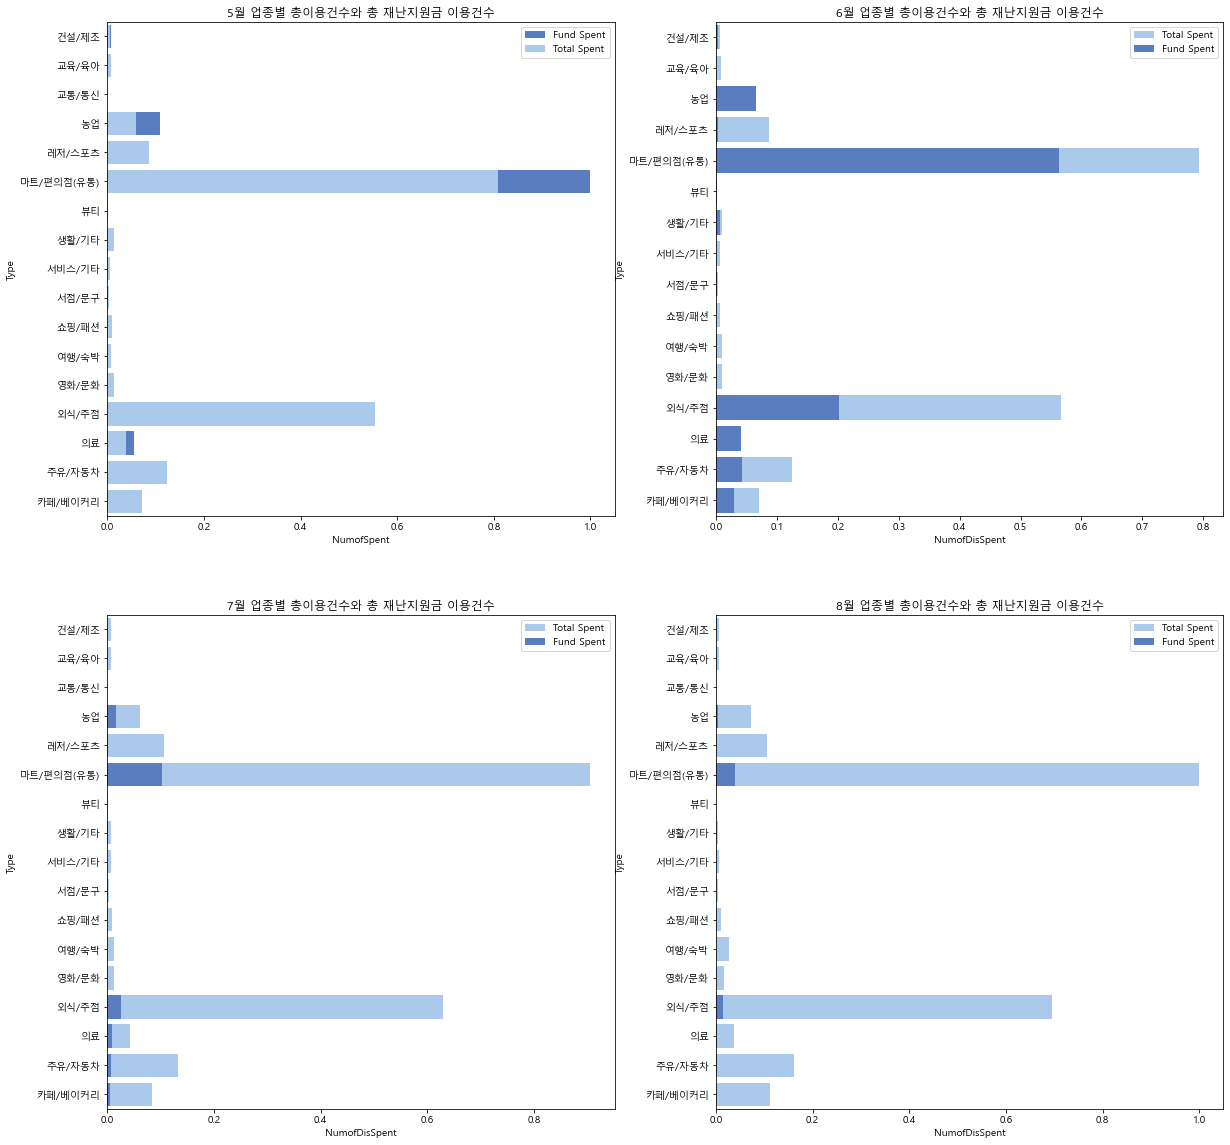

In [74]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.set_color_codes('muted')
ax1 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202005], label='Fund Spent', color='b')
ax1 = sns.set_color_codes('pastel')
ax1 = sns.barplot(x='NumofSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202005], label='Total Spent', color='b')
ax1.legend(loc='best', frameon=True)
ax1.set_title('5월 업종별 총이용건수와 총 재난지원금 이용건수')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.set_color_codes('pastel')
ax2 = sns.barplot(x='NumofSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202006], label='Total Spent', color='b')
ax2 = sns.set_color_codes('muted')
ax2 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202006], label='Fund Spent', color='b')
ax2.legend(loc='best', frameon=True)
ax2.set_title('6월 업종별 총이용건수와 총 재난지원금 이용건수')

ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.set_color_codes('pastel')
ax3 = sns.barplot(x='NumofSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202007], label='Total Spent', color='b')
ax3 = sns.set_color_codes('muted')
ax3 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202007], label='Fund Spent', color='b')
ax3.legend(loc='best', frameon=True)
ax3.set_title('7월 업종별 총이용건수와 총 재난지원금 이용건수')

ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.set_color_codes('pastel')
ax4 = sns.barplot(x='NumofSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202008], label='Total Spent', color='b')
ax4 = sns.set_color_codes('muted')
ax4 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_hankyung[norm_hankyung['YM'] == 202008], label='Fund Spent', color='b')
ax4.legend(loc='best', frameon=True)
ax4.set_title('8월 업종별 총이용건수와 총 재난지원금 이용건수')
plt.show()

In [60]:
## norm 하지 않은 'NumofSpent', 'NumofDisSpent' barchart 따로 보기

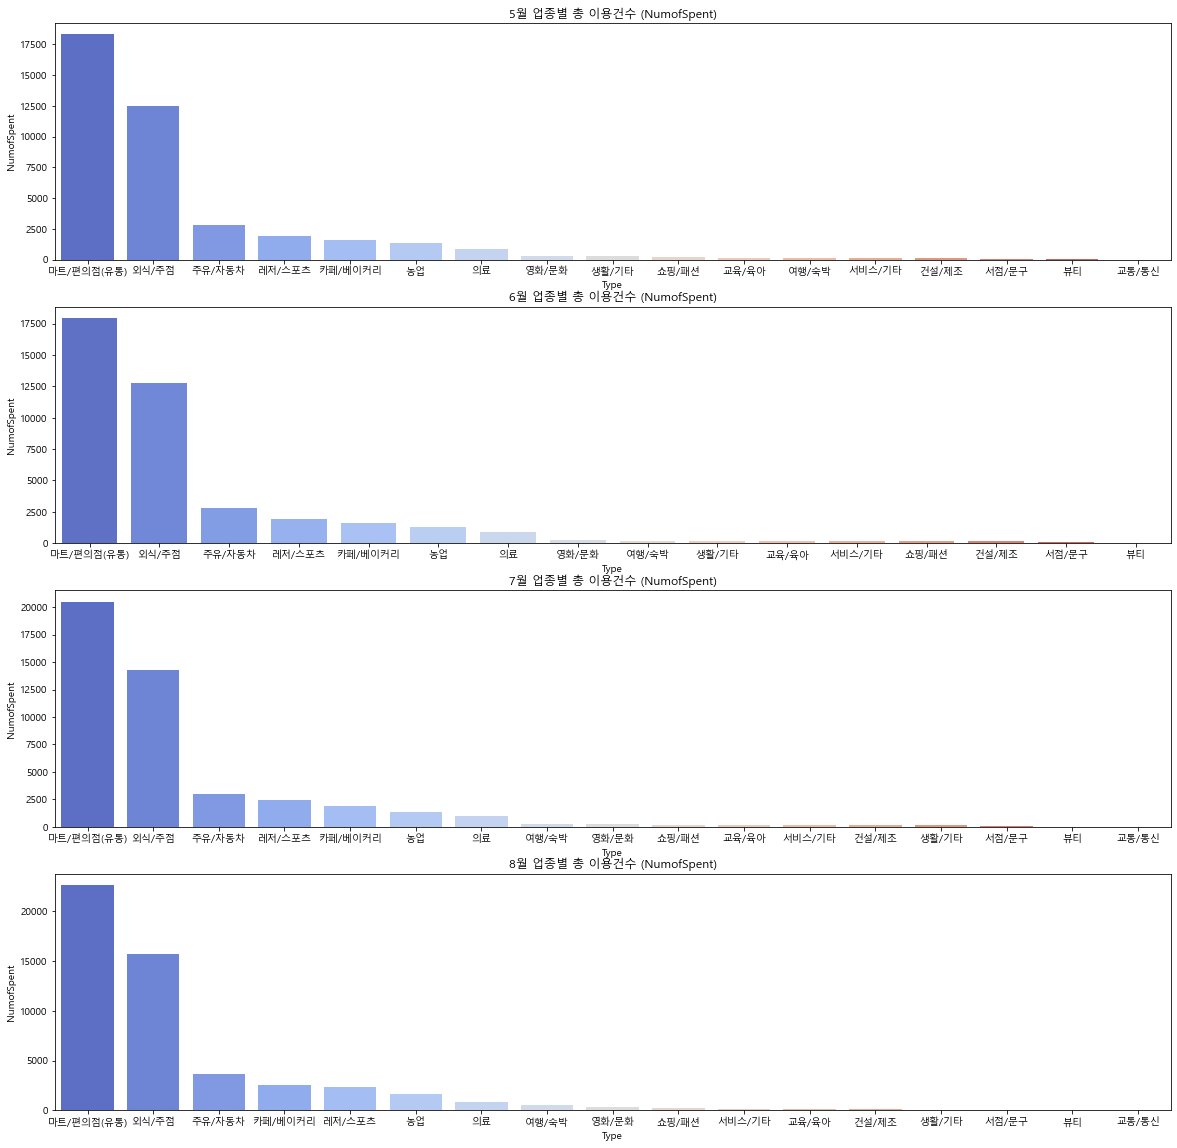

In [61]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(x='Type', y='NumofSpent', data=tot_hankyung[tot_hankyung['YM'] == 202005].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax1.set_title('5월 업종별 총 이용건수 (NumofSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(x='Type', y='NumofSpent', data=tot_hankyung[tot_hankyung['YM'] == 202006].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax2.set_xticks(fontsize=10, rotation=45)
ax2.set_title('6월 업종별 총 이용건수 (NumofSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(x='Type', y='NumofSpent', data=tot_hankyung[tot_hankyung['YM'] == 202007].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax3.set_xticks(fontsize=10, rotation=45)
ax3.set_title('7월 업종별 총 이용건수 (NumofSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(x='Type', y='NumofSpent', data=tot_hankyung[tot_hankyung['YM'] == 202008].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax4.set_title('8월 업종별 총 이용건수 (NumofSpent)')
plt.show()

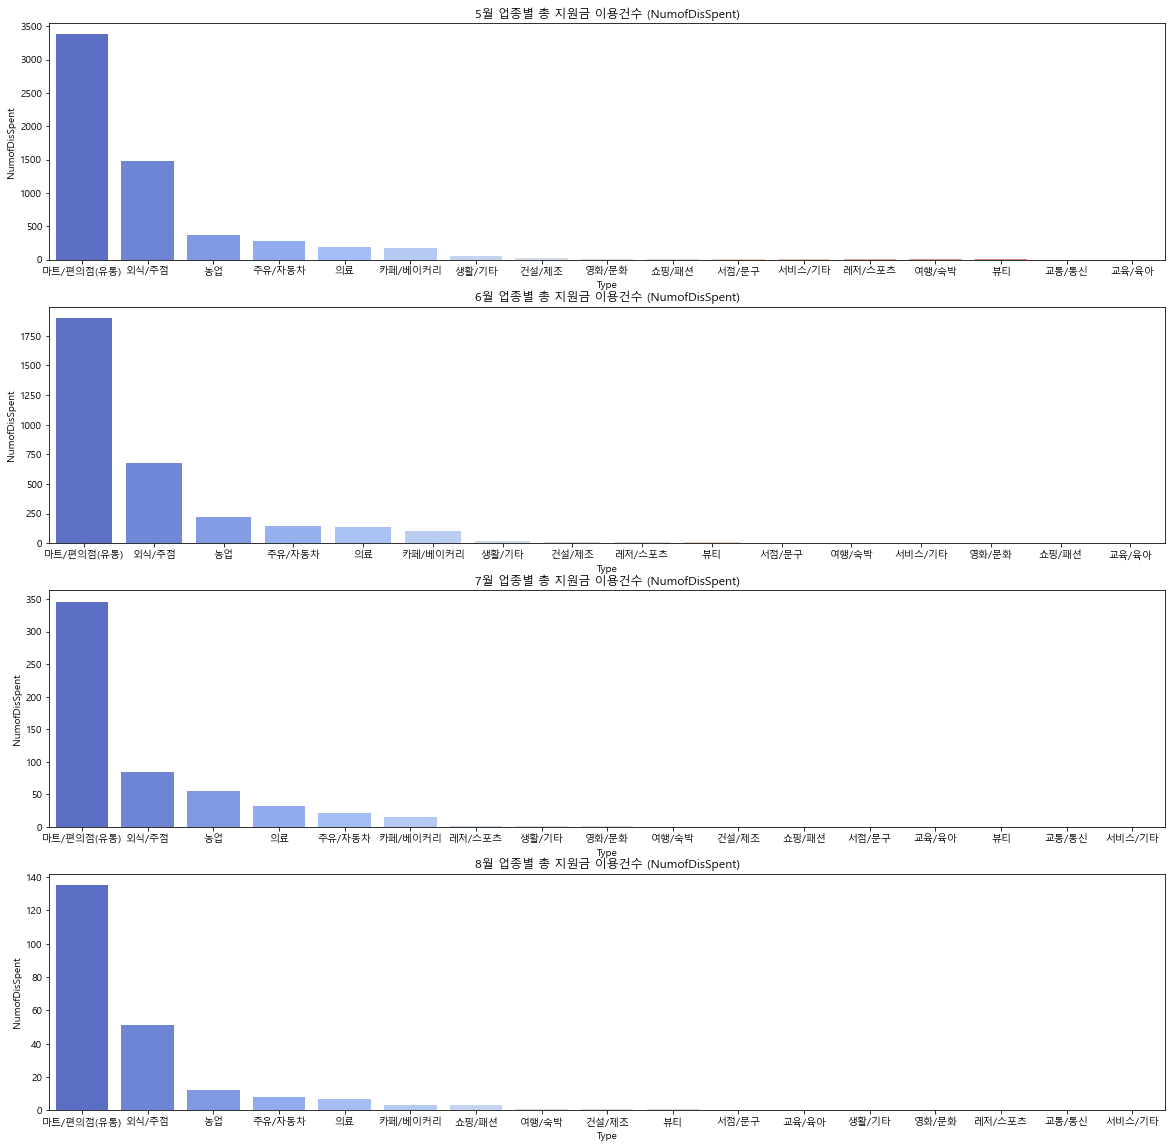

In [62]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202005].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax1.set_title('5월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202006].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax2.set_xticks(fontsize=10, rotation=45)
ax2.set_title('6월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202007].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax3.set_xticks(fontsize=10, rotation=45)
ax3.set_title('7월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_hankyung[tot_hankyung['YM'] == 202008].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax4.set_title('8월 업종별 총 지원금 이용건수 (NumofDisSpent)')
plt.show()

### 업종 시간대별 총 이용건수 추이

In [63]:
time_may_cat = hankyung[hankyung['YM'] == 202005].groupby(['Type', 'Time'], as_index=False).sum()
may_cat = hankyung[hankyung['YM'] == 202005].groupby(['Type'], as_index=False).sum()
may_cat = may_cat.sort_values(by='NumofSpent', ascending=False).head(10)
may_cat = [i for i in may_cat['Type']]
plot_may = time_may_cat[time_may_cat['Type'].isin((may_cat))]

time_jun_cat = hankyung[hankyung['YM'] == 202006].groupby(['Type', 'Time'], as_index=False).sum()
jun_cat = hankyung[hankyung['YM'] == 202006].groupby(['Type'], as_index=False).sum()
jun_cat = jun_cat.sort_values(by='NumofSpent', ascending=False).head(10)
jun_cat = [i for i in jun_cat['Type']]
plot_jun = time_jun_cat[time_jun_cat['Type'].isin((jun_cat))]

time_jul_cat = hankyung[hankyung['YM'] == 202007].groupby(['Type', 'Time'], as_index=False).sum()
jul_cat = hankyung[hankyung['YM'] == 202007].groupby(['Type'], as_index=False).sum()
jul_cat = jul_cat.sort_values(by='NumofSpent', ascending=False).head(10)
jul_cat = [i for i in jul_cat['Type']]
plot_jul = time_jul_cat[time_jul_cat['Type'].isin((jul_cat))]

time_aug_cat = hankyung[hankyung['YM'] == 202008].groupby(['Type', 'Time'], as_index=False).sum()
aug_cat = hankyung[hankyung['YM'] == 202008].groupby(['Type'], as_index=False).sum()
aug_cat = aug_cat.sort_values(by='NumofSpent', ascending=False).head(10)
aug_cat = [i for i in aug_cat['Type']]
plot_aug = time_aug_cat[time_aug_cat['Type'].isin((aug_cat))]

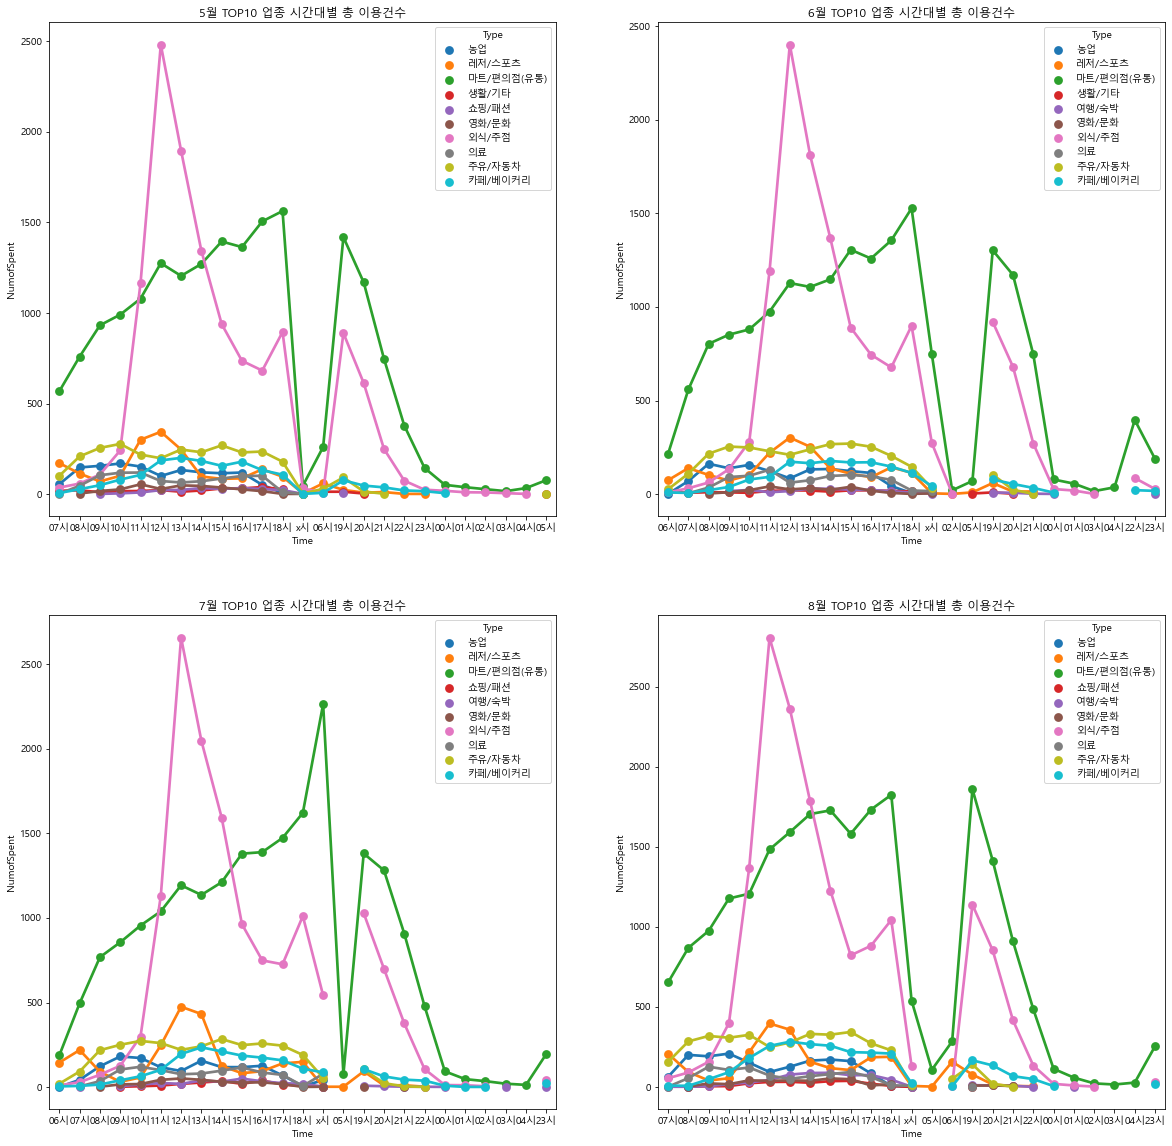

In [64]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_may)
ax1.set_title('5월 TOP10 업종 시간대별 총 이용건수')

ax2 = fig.add_subplot(222)
ax2 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jun)
ax2.set_title('6월 TOP10 업종 시간대별 총 이용건수')

ax3 = fig.add_subplot(223)
ax3 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jul)
ax3.set_title('7월 TOP10 업종 시간대별 총 이용건수')

ax4 = fig.add_subplot(224)
ax4 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_aug)
ax4.set_title('8월 TOP10 업종 시간대별 총 이용건수')
plt.show()

In [188]:
# col = ['NumofSpent', 'NumofDisSpent']
# num2_hankyung = hankyung[col] / hankyung[col].max()

# norm2_hankyung = hankyung.copy()
# norm2_hankyung[col] = num2_hankyung[col]
# norm2_hankyung.tail()

In [189]:
# time_may_cat = norm2_hankyung[norm2_hankyung['YM'] == 202005].groupby(['Type', 'Time'], as_index=False).sum()
# may_cat = norm2_hankyung[norm2_hankyung['YM'] == 202005].groupby(['Type'], as_index=False).sum()
# may_cat = may_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# may_cat = [i for i in may_cat['Type']]
# plot_may = time_may_cat[time_may_cat['Type'].isin((may_cat))]

# time_jun_cat = norm2_hankyung[norm2_hankyung['YM'] == 202006].groupby(['Type', 'Time'], as_index=False).sum()
# jun_cat = norm2_hankyung[norm2_hankyung['YM'] == 202006].groupby(['Type'], as_index=False).sum()
# jun_cat = jun_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# jun_cat = [i for i in jun_cat['Type']]
# plot_jun = time_jun_cat[time_jun_cat['Type'].isin((jun_cat))]

# time_jul_cat = norm2_hankyung[norm2_hankyung['YM'] == 202007].groupby(['Type', 'Time'], as_index=False).sum()
# jul_cat = norm2_hankyung[norm2_hankyung['YM'] == 202007].groupby(['Type'], as_index=False).sum()
# jul_cat = jul_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# jul_cat = [i for i in jul_cat['Type']]
# plot_jul = time_jul_cat[time_jul_cat['Type'].isin((jul_cat))]

# time_aug_cat = norm2_hankyung[norm2_hankyung['YM'] == 202008].groupby(['Type', 'Time'], as_index=False).sum()
# aug_cat = norm2_hankyung[norm2_hankyung['YM'] == 202008].groupby(['Type'], as_index=False).sum()
# aug_cat = aug_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# aug_cat = [i for i in aug_cat['Type']]
# plot_aug = time_aug_cat[time_aug_cat['Type'].isin((aug_cat))]

In [190]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(221)
# ax1 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_may)
# ax1.set_title('5월 TOP10 업종 시간대별 총 이용건수')

# ax2 = fig.add_subplot(222)
# ax2 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jun)
# ax2.set_title('6월 TOP10 업종 시간대별 총 이용건수')

# ax3 = fig.add_subplot(223)
# ax3 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jul)
# ax3.set_title('7월 TOP10 업종 시간대별 총 이용건수')

# ax4 = fig.add_subplot(224)
# ax4 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_aug)
# ax4.set_title('8월 TOP10 업종 시간대별 총 이용건수')
# plt.show()

In [65]:
tim_hankyung = hankyung.groupby(['YM', 'Type', 'Time'], as_index=False).sum()
tim_hankyung['Type'].unique()

array(['건설/제조', '교육/육아', '교통/통신', '농업', '레저/스포츠', '마트/편의점(유통)', '뷰티',
       '생활/기타', '서비스/기타', '서점/문구', '쇼핑/패션', '여행/숙박', '영화/문화', '외식/주점',
       '의료', '주유/자동차', '카페/베이커리'], dtype=object)

In [66]:
## '먹거리'라고 생각되는 Type 따로 불러와서 시간대별 추이 보기

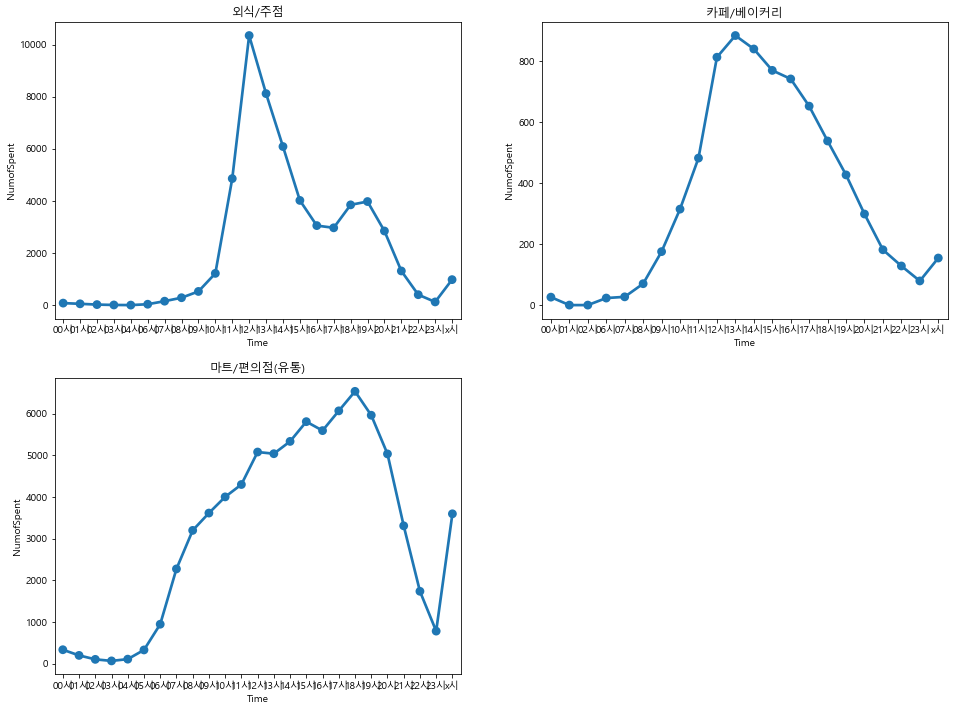

In [67]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x='Time', y='NumofSpent', data=tim_hankyung[(tim_hankyung['Type'] == '외식/주점')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax1.set_title('외식/주점')
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x='Time', y='NumofSpent', data=tim_hankyung[(tim_hankyung['Type'] == '카페/베이커리')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax2.set_title('카페/베이커리')
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x='Time', y='NumofSpent', data=tim_hankyung[(tim_hankyung['Type'] == '마트/편의점(유통)')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax3.set_title('마트/편의점(유통)')
plt.show()

### folium

In [217]:
hankyung.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category
279420,191507,191507,202008,제주특별자치도,제주시,영세,기타숙박업,18시,1938000,0,1,0,883243.6727,1.481745e+06,126.24562415185463,33.32085488754027,126.24562415185463_33.32085488754027,한경면,카페/베이커리
279759,210013,210013,202008,제주특별자치도,제주시,영세,기타숙박업,19시,70000,0,1,0,877232.2099,1.484715e+06,126.18065059192516,33.34696698754469,126.18065059192516_33.34696698754469,한경면,마트/편의점(유통)
279760,241385,241385,202008,제주특별자치도,제주시,영세,기타숙박업,21시,120000,0,1,0,877232.2099,1.484715e+06,126.18065059192516,33.34696698754469,126.18065059192516_33.34696698754469,한경면,레저/스포츠
279761,210048,210048,202008,제주특별자치도,제주시,영세,기타음료식품,19시,26000,0,1,0,877829.2907,1.485267e+06,126.1869909618797,33.35201808683074,126.1869909618797_33.35201808683074,한경면,마트/편의점(유통)
280065,269369,269369,202008,제주특별자치도,제주시,영세,예체능학원,x시,136000,0,1,0,881934.4955,1.483788e+06,126.23129493157387,33.339133500362976,126.23129493157387_33.339133500362976,한경면,여행/숙박


In [69]:
# 외식/주점
wesik = hankyung[hankyung['Type'] == '외식/주점']
wesik = wesik[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
wesik.drop_duplicates(inplace=True)

# 마트/편의점(유통)
mart = hankyung[hankyung['Type'] == '마트/편의점(유통)']
mart = mart[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
mart.drop_duplicates(inplace=True)

# 농업
nong = hankyung[hankyung['Type'] == '농업']
nong = nong[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
nong.drop_duplicates(inplace=True)

# 교육/육아
car = hankyung[hankyung['Type'] == '주유/자동차']
car = car[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
car.drop_duplicates(inplace=True)

In [70]:
import folium
from folium.plugins import MarkerCluster, MiniMap

In [71]:
map = folium.Map((33.32085488754027, 126.24562415185463), zoom_start=13)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=[33.32085488754027, 126.24562415185463], popup='중소2', icon=folium.Icon(color='red')))
minimap = MiniMap()
map.add_child(minimap)

In [73]:
map = folium.Map((33.32085488754027, 126.24562415185463), zoom_start= 13)

# 외식/주점 
for i in range(len(wesik['Type'])):
    folium.Circle(list(wesik.iloc[i][['lat','lon']]), radius=5, color='crimson', fill_color='crimson').add_to(map)
    
# 마트/편의점(유통) 
for i in range(len(mart['Type'])):
    folium.Circle(list(mart.iloc[i][['lat','lon']]), radius=5, color='orange', fill_color='orange').add_to(map)
    
# 카페/베이커리 
for i in range(len(nong['Type'])):
    folium.Circle(list(nong.iloc[i][['lat','lon']]), radius=5, color='green', fill_color='green').add_to(map)

# 교육/육아 
for i in range(len(car['Type'])):
    folium.Circle(list(car.iloc[i][['lat','lon']]), radius=5, color='gray', fill_color='gray').add_to(map)
    
map